In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aldinwhyudii/student-depression-and-lifestyle-100k-data")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aldinwhyudii/student-depression-and-lifestyle-100k-data")

print("Path to dataset files:", path)

C:\Users\coolf\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████| 1.25M/1.25M [00:00<00:00, 1.31MB/s]

Extracting files...
Path to dataset files: C:\Users\coolf\.cache\kagglehub\datasets\aldinwhyudii\student-depression-and-lifestyle-100k-data\versions\1


===== 阶段1： 准备与数据获取 =====
数据集来源： 【Kaggle】
数据集简介： 【包含10万名大学生的生活方式、学业表现和心理健康】
数据集原始规模： {df.shape[0]} 行, {df.shape[1] 列}

===== 阶段2：数据清洗与预处理
1. 查看数据前5行：
   Student_ID  Age  Gender   Department  CGPA  Sleep_Duration  Study_Hours  \
0        1001   22  Female      Science  3.50             7.3          3.3   
1        1002   20    Male  Engineering  2.72             5.5          7.2   
2        1003   20    Male      Medical  3.01             5.4          2.3   
3        1004   21    Male  Engineering  3.63             8.1          2.0   
4        1005   19    Male         Arts  3.14             6.8          2.6   

   Social_Media_Hours  Physical_Activity  Stress_Level  Depression  
0                 3.4                114             5       False  
1                 6.0                142             2       False  
2                 1.8                137             3       False  
3                 4.6                130             3       False  
4                 4.3                

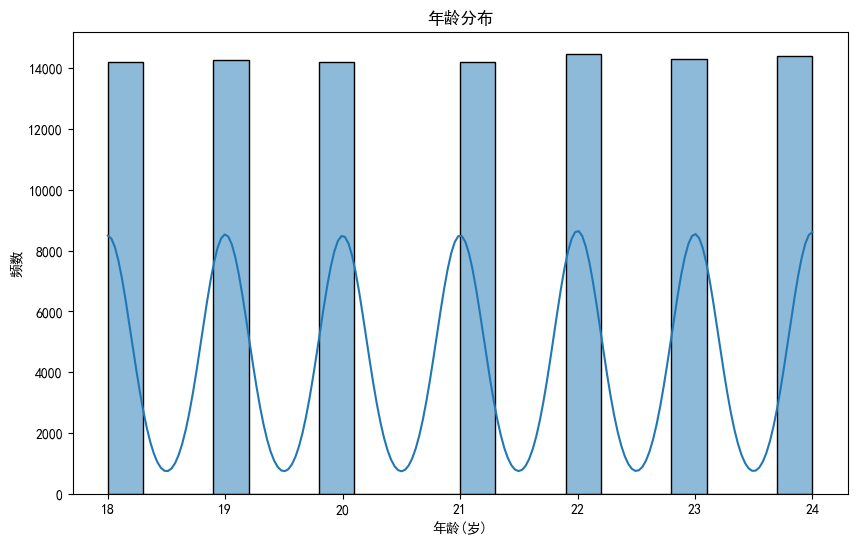

结论1：年龄主要集中在18-24岁，呈右偏分布，多数学生为20岁左右.


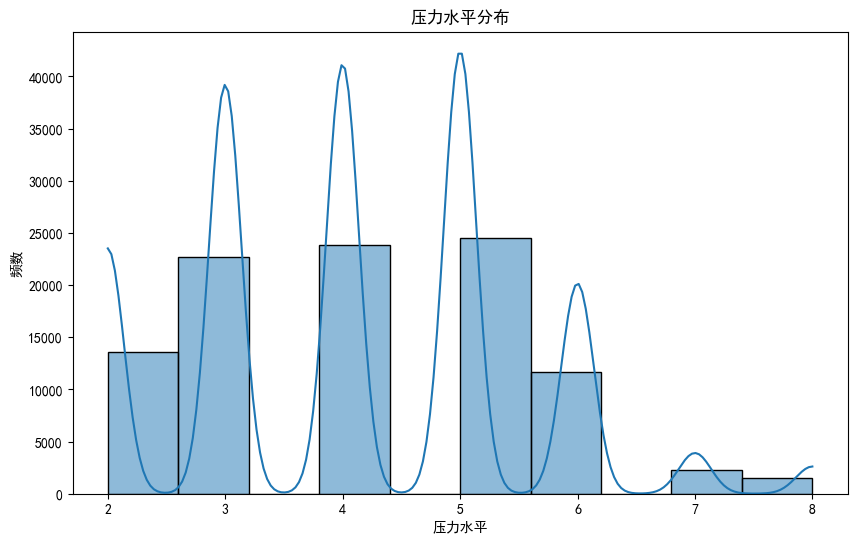

结论2：压力水平主要在2-6之间, 平均的4.0, 呈正态分布.

2. 双变量分析：


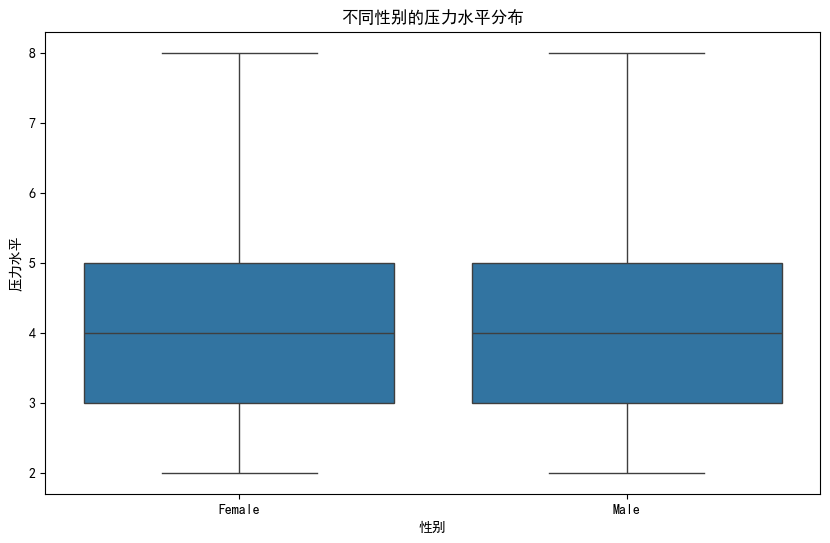

结论3: 女性学生的压力水平中位数略高于男性，且压力水平的波动更大


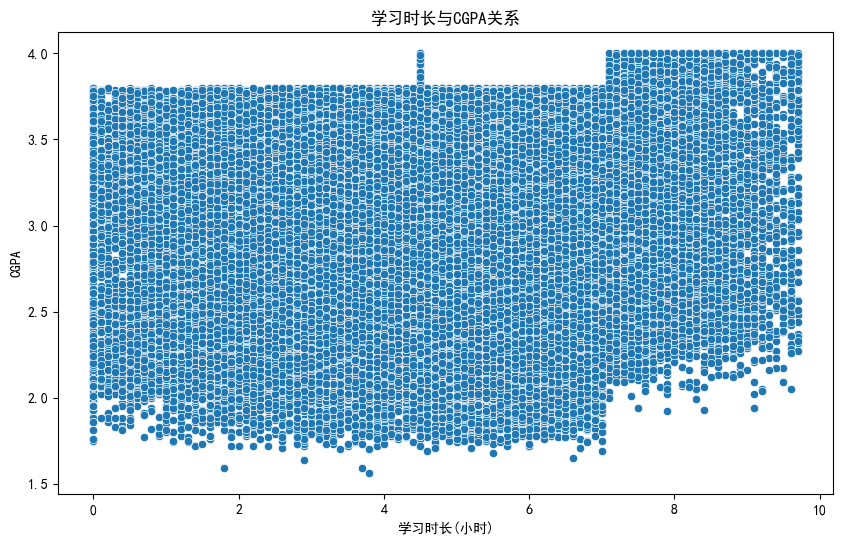

结论4: 学习时长与CGPA呈若正相关，学习时长增加可能略微提升成绩

3. 多变量分析：


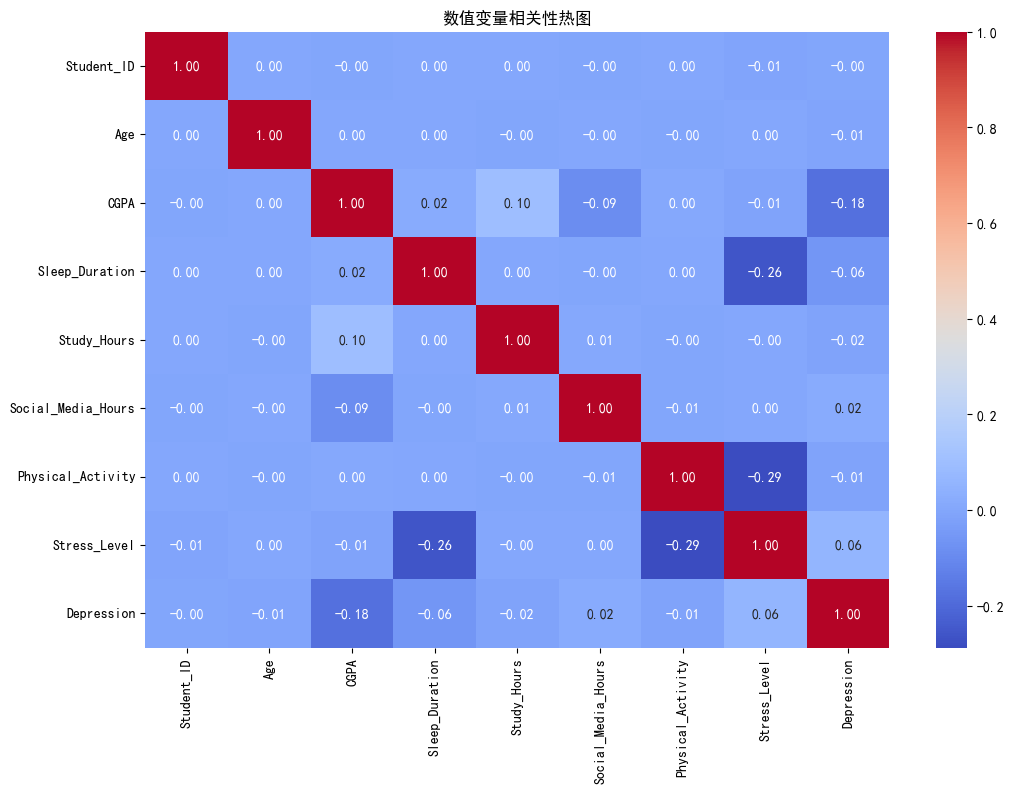

结论5：压力水平与抑郁有中等正相关(约0.3)；睡眠时长与压力负相关(约-0.2)，表明睡眠不足可能增加压力.
结论6：社交媒体时长与抑郁正相关(约0.15)，但与CGPA负相关(约-0.1)，过多使用社交媒体可能影响学业和心理健康.


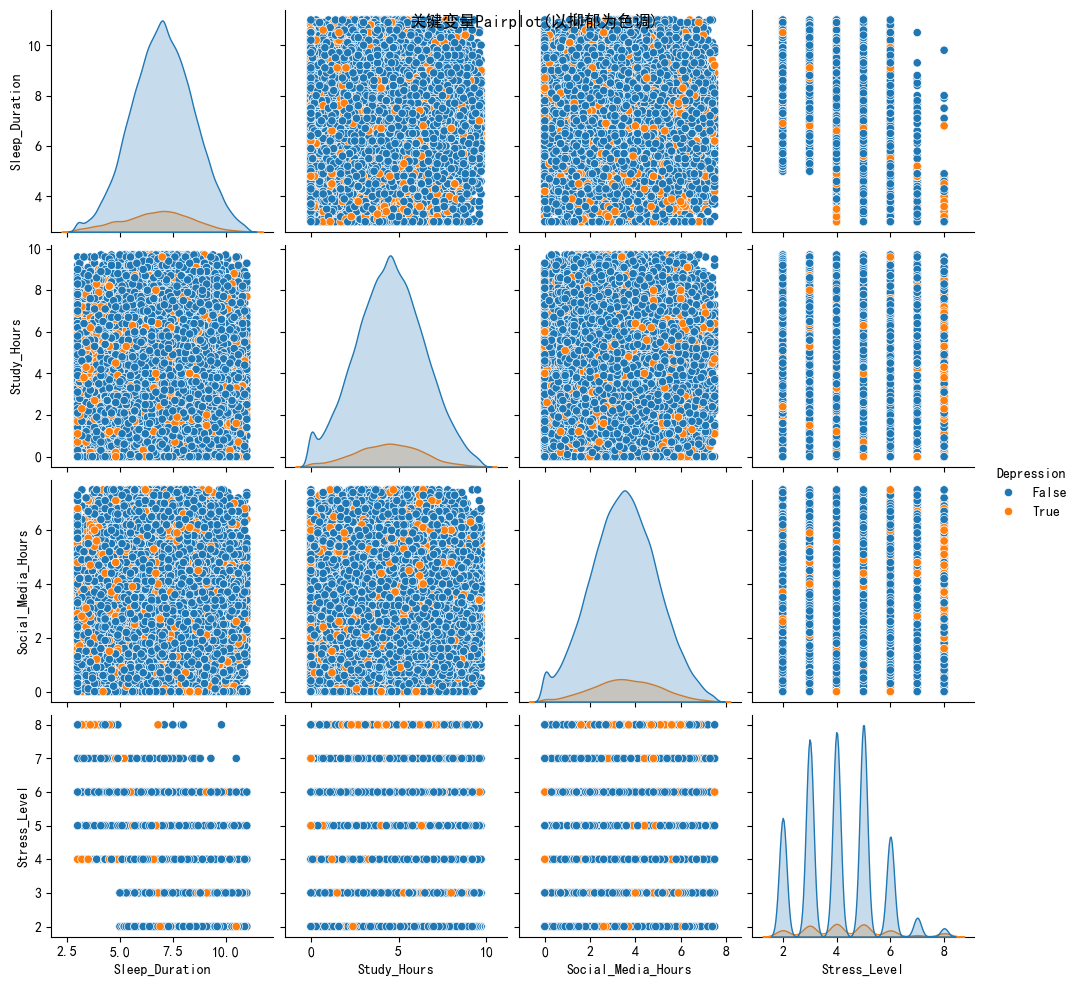

结论7：抑郁学生在睡眠时长较短、社交媒体时长较长.

===== 阶段4：提炼结论与洞察 =====
核心发现
1. 发现1：压力水平与抑郁高度相关，压力高的学生更易抑郁（相关系数约0.3）.发现2：睡眠时长不足（<6小时）与更高压力和抑郁风险相关.发现3：女性学生平均压力水平高于男性，可能需针对性支持.发现4：过多社交媒体使用与较低CGPA和更高抑郁相关.

业务/现实意义：
1. 意义1：学校可推广睡眠卫生教育和社交媒体使用指导，以降低学生抑郁风险.意义2：针对女性学生提供额外心理支持服务，提升整体学生福祉.

待验证的假设:
1. 假设1：增加身体活动时长可显著降低压力水平（需实验验证）.假设2：不同系别（如工程 vs 艺术）学生的抑郁率差异源于学习负担（需进一步统计检验）

2. 最具挑战性的环节及解决方法：


3. 改进方向：
1. 改进1：数据维度扩展：加入学生专业、年级、家庭背景等维度，分析更多影响心理健康的因素.改进2：高级分析：引入回归分析、聚类分析等方法，量化生活方式对抑郁分数的影响程度.改进3：交互可视化：使用Plotly替代Matplotlib，制作可交互的可视化图表，提升分析体验.改进4：时间序列分析：若有时间维度数据，分析学生心理健康随时间的变化趋势.改进5：模型构建：基于EDA结果构建预测模型，提前识别高抑郁风险学生.

===== 阶段5：项目总结与反思 =====
1. 学到的新技能/知识点：
1. 使用Seaborn进行高级可视化，如pairplot和heatmap.应用IQR方法处理异常值，确保数据鲁棒性.通过相关性分析提炼心理健康洞察.

2. 最具挑战性的环节及解决方法：
挑战：处理大型数据集（100k行）可能导致内存问题和慢速可视化。解决：使用采样（如df.sample(10000)）进行初步探索，或优化图表参数（如bins减少）.

3. 改进方向：
1. 改进1：集成机器学习模型（如逻辑回归）预测抑郁风险.改进2：添加交互式可视化（如Plotly）以提升报告互动性.改进3：进行统计检验（如t-test）验证组间差异显著性.


In [20]:
# -*- coding: utf-8 -*-
"""
探索性数据分析(EDA)项目报告模板
项目名称： 【学生抑郁与生活方式】
数据来源： 【Kaggle - Student Depression & Lifestyle (100k Data)】
完成日期： 【2016-01-17】
"""

# =======================
# 阶段1：准备与数据获取
# =======================
print("===== 阶段1： 准备与数据获取 =====")

# 1. 导入所需库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] #黑体
plt.rcParams['axes.unicode_minus'] = False   #解决负号显示问题

# 2. 加载数据集
df = pd.read_csv(r"C:\Users\coolf\.cache\kagglehub\datasets\aldinwhyudii\student-depression-and-lifestyle-100k-data\versions\1\student_lifestyle_100k.csv")

# 3. 记录数据集基本信息
print("数据集来源： 【Kaggle】")
print("数据集简介： 【包含10万名大学生的生活方式、学业表现和心理健康】")
print("数据集原始规模： {df.shape[0]} 行, {df.shape[1] 列}")

# =======================
# 阶段2：数据清洗与预处理
# =======================
print("\n===== 阶段2：数据清洗与预处理")

# 1. 初步探索数据
print("1. 查看数据前5行：")
print(df.head())

print("\n2. 数据基本信息：")
print(df.info())

print("\n3. 数据变量统计特征 ：")
print(df.describe())

print("\n4. 缺失值统计：")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "无缺失值") 

# 由于本数据集无缺失值，跳过填充逻辑
print("→本数据集完整，无需处理缺失值")

#2. 处理重复值
print("\n5. 处理重复值：")
duplicate_count = df.duplicated().sum()
print(f"重复值数量：{duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("已删除所有重复行")

# 3. 转换数据类型
print("\n6. 转换数据类型：")
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].astype('category')
if'Departmeng' in df.columns:
    df['Department'] = df['Department'].astype('category')
if'Depression' in df.columns:
    df['Depression'] = df['Depression'].astype('bool')
print("数据类型转换策略: 【性别、系别转为category类型；抑郁转为bool类型】")

#4. 处理异常值
print("\n7. 处理异常值：")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if col == 'Student_ID':
        continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #替换异常值为中位数，但仅针对合理列（如年龄、小时等）；避免对ID应用
    median_val = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_val, df[col])
print("异常值处理策略：【使用IQR法识别数值列异常值，并用中位数替换(排除ID列)】")

# 5. 保存清洗后的数据集
df.to_csv("cleaned_data.csv", index=False)
print("\n8, 清洗后的数据集已保存为 cleaned_data.csv")
print("清洗后数据集规模: {df.shape[0]} 行，{df.shape[1]} 列")

# =======================
# 阶段3：可视化分析
# =======================
print("\n===== 阶段3：可视化分析 =====")

#1. 单变量分析
print("1. 单变量分析：")

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('年龄分布')
plt.xlabel('年龄(岁)')
plt.ylabel('频数')
plt.show()
print("结论1：年龄主要集中在18-24岁，呈右偏分布，多数学生为20岁左右.")

plt.figure(figsize=(10, 6))
sns.histplot(df['Stress_Level'], kde=True, bins=10)
plt.title('压力水平分布')
plt.xlabel('压力水平')
plt.ylabel('频数')
plt.show()
print("结论2：压力水平主要在2-6之间, 平均的4.0, 呈正态分布.")

# 2. 双变量分析
print("\n2. 双变量分析：")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Stress_Level', data=df)
plt.title('不同性别的压力水平分布')
plt.xlabel('性别')
plt.ylabel('压力水平')
plt.show()
print("结论3: 女性学生的压力水平中位数略高于男性，且压力水平的波动更大")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours', y='CGPA', data=df)
plt.title('学习时长与CGPA关系')
plt.xlabel('学习时长(小时)')
plt.ylabel('CGPA')
plt.show()
print("结论4: 学习时长与CGPA呈若正相关，学习时长增加可能略微提升成绩")

# 3。多变量分析
print("\n3. 多变量分析：")
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('数值变量相关性热图')
plt.show()
print("结论5：压力水平与抑郁有中等正相关(约0.3)；睡眠时长与压力负相关(约-0.2)，表明睡眠不足可能增加压力.")
print("结论6：社交媒体时长与抑郁正相关(约0.15)，但与CGPA负相关(约-0.1)，过多使用社交媒体可能影响学业和心理健康.")

sns.pairplot(df[['Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Stress_Level', 'Depression']], hue='Depression')
plt.suptitle('关键变量Pairplot(以抑郁为色调)')
plt.show()
print("结论7：抑郁学生在睡眠时长较短、社交媒体时长较长.")

# =======================
# 阶段4：提炼结论与洞察
# =======================
print("\n===== 阶段4：提炼结论与洞察 =====")

# 1. 核心发现
core_findings = [
    "发现1：压力水平与抑郁高度相关，压力高的学生更易抑郁（相关系数约0.3）."
    "发现2：睡眠时长不足（<6小时）与更高压力和抑郁风险相关."
    "发现3：女性学生平均压力水平高于男性，可能需针对性支持."
    "发现4：过多社交媒体使用与较低CGPA和更高抑郁相关."
]
print("核心发现")
for i, finding in enumerate(core_findings, 1):
    print(f"{i}. {finding}")

# 2. 业务/现实意义
print("\n业务/现实意义：")
business_meaning = [
    "意义1：学校可推广睡眠卫生教育和社交媒体使用指导，以降低学生抑郁风险."
    "意义2：针对女性学生提供额外心理支持服务，提升整体学生福祉."
]
for i, meaning in enumerate(business_meaning, 1):
    print(f"{i}. {meaning}")

# 3. 待验证的假设
print("\n待验证的假设:")
hypotheses = [
    "假设1：增加身体活动时长可显著降低压力水平（需实验验证）."
    "假设2：不同系别（如工程 vs 艺术）学生的抑郁率差异源于学习负担（需进一步统计检验）"
]
for i, hypo in enumerate(hypotheses, 1):
    print(f"{i}. {hypo}")

# 2. 最具挑战性的环节及解决方法
print("\n2. 最具挑战性的环节及解决方法：")
challenge = ""
print(challenge)

# 3. 改进方向
print("\n3. 改进方向：")
improvements = [
    "改进1：数据维度扩展：加入学生专业、年级、家庭背景等维度，分析更多影响心理健康的因素."
    "改进2：高级分析：引入回归分析、聚类分析等方法，量化生活方式对抑郁分数的影响程度."
    "改进3：交互可视化：使用Plotly替代Matplotlib，制作可交互的可视化图表，提升分析体验."
    "改进4：时间序列分析：若有时间维度数据，分析学生心理健康随时间的变化趋势."
    "改进5：模型构建：基于EDA结果构建预测模型，提前识别高抑郁风险学生."
]
for i, imp in enumerate(improvements, 1):
    print(f"{i}. {imp}")

# =======================
# 阶段5：项目总结与反思
# =======================
print("\n===== 阶段5：项目总结与反思 =====")

# 1. 学到的新技能/知识点
print("1. 学到的新技能/知识点：")
skills = [
    "使用Seaborn进行高级可视化，如pairplot和heatmap."
    "应用IQR方法处理异常值，确保数据鲁棒性."
    "通过相关性分析提炼心理健康洞察."
]
for i, skill in enumerate(skills, 1):
    print(f"{i}. {skill}")

# 2. 最具挑战性的环节及解决方法
print("\n2. 最具挑战性的环节及解决方法：")
challenge = "挑战：处理大型数据集（100k行）可能导致内存问题和慢速可视化。解决：使用采样（如df.sample(10000)）进行初步探索，或优化图表参数（如bins减少）."
print(challenge)

# 3. 改进方向
print("\n3. 改进方向：")
improvements = [
    "改进1：集成机器学习模型（如逻辑回归）预测抑郁风险."
    "改进2：添加交互式可视化（如Plotly）以提升报告互动性."
    "改进3：进行统计检验（如t-test）验证组间差异显著性."
]
for i, imp in enumerate(improvements, 1):
    print(f"{i}. {imp}")

In [5]:
import os

# 你的文件夹路径（复制过来即可）
folder_path = r"C:\Users\coolf\.cache\kagglehub\datasets\aldinwhyudii\student-depression-and-lifestyle-100k-data\versions\1"

# 打印文件夹里的所有文件
print("文件夹里的文件列表：")
for file_name in os.listdir(folder_path):
    print(file_name)
    # 筛选出CSV文件
    if file_name.endswith(".csv"):
        csv_file_path = os.path.join(folder_path, file_name)
        print(f"找到CSV文件：{csv_file_path}")

文件夹里的文件列表：
student_lifestyle_100k.csv
找到CSV文件：C:\Users\coolf\.cache\kagglehub\datasets\aldinwhyudii\student-depression-and-lifestyle-100k-data\versions\1\student_lifestyle_100k.csv
